In [1]:
print("""
@File         : excel_automation.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-12-29 16:33:38
@Email        : cuixuanstephen@gmail.com
@Description  : Excel Automation
""")


@File         : excel_automation.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-12-29 16:33:38
@Email        : cuixuanstephen@gmail.com
@Description  : Excel Automation



In [2]:
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

%cd ../

d:\Data-Analysis-and-Science\PY4XL


In [40]:
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f'Trial {i}' for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,-1.019289,-0.342181,0.579698,1.083085,-0.484290
1,-0.246703,-0.452803,-0.847609,-2.338731,-0.500897
2,0.252030,-1.609036,0.324848,-0.296179,-0.421535
3,-1.077997,-0.219304,-0.920679,2.786809,0.028387
4,0.663799,1.450110,-0.259580,0.266424,-0.437308
...,...,...,...,...,...
95,0.848237,1.098147,1.902137,0.509250,0.183222
96,-1.362914,-1.006686,-0.277222,-0.692667,0.963067
97,0.311406,-0.100521,0.269317,-0.872871,0.257115
98,0.075411,-0.973479,0.189711,2.225414,0.212025


In [41]:
xw.view(df)

### Excel 对象模型

In [42]:
book = xw.Book()
book.name

'Book2'

In [43]:
book.sheets

Sheets([<Sheet [Book2]Sheet1>])

In [44]:
sheet1 = book.sheets[0]

In [45]:
sheet1 = book.sheets['Sheet1']

In [46]:
sheet1.range("A1")

<Range [Book2]Sheet1!$A$1>

In [47]:
sheet1.range('A1').value = [[1, 2], [3, 4]]
sheet1.range('A4').value = 'Hello!'

In [48]:
sheet1.range('A1:B2').value

[[1.0, 2.0], [3.0, 4.0]]

In [49]:
sheet1.range('A4').value

'Hello!'

In [50]:
sheet1.range('A1:B2')[0, 0]

<Range [Book2]Sheet1!$A$1>

In [51]:
sheet1.range('A1:B2')[:, 1]

<Range [Book2]Sheet1!$B$1:$B$2>

In [52]:
sheet1['A1']

<Range [Book2]Sheet1!$A$1>

In [53]:
sheet1['A1:B2']

<Range [Book2]Sheet1!$A$1:$B$2>

In [54]:
sheet1[0, 0]

<Range [Book2]Sheet1!$A$1>

In [55]:
sheet1[:2, :2]

<Range [Book2]Sheet1!$A$1:$B$2>

In [56]:
sheet1[9, 3]

<Range [Book2]Sheet1!$D$10>

In [57]:
sheet1.range((10, 4))

<Range [Book2]Sheet1!$D$10>

In [58]:
sheet1[9:11, 3:6]

<Range [Book2]Sheet1!$D$10:$F$11>

In [59]:
sheet1.range((10, 4), (11, 6))

<Range [Book2]Sheet1!$D$10:$F$11>

In [60]:
sheet1['A1'].sheet.book.app

<App [excel] 15544>

In [61]:
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [62]:
[book.name for book in visible_app.books]

['Book1', 'Book2']

In [63]:
[book.name for book in invisible_app.books]

['Book3']

In [64]:
xw.apps.keys()

[16260, 15544]

In [65]:
xw.apps.active.pid

16260

In [66]:
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]['A1'].value = 'Create by on invisible app.'

In [67]:
invisible_book.save('xl/invisible.xlsx')
invisible_app.quit()

### 运行 VBA 代码

In [68]:
vba_book = xw.Book('xl/vba.xlsm')

In [32]:
mysum = vba_book.macro('Module1.MySum')
mysum(5, 4)

9.0

In [69]:
show_msgbox = vba_book.macro('Module1.ShowMsgBox')
show_msgbox('Hello xlwings!')

In [70]:
vba_book.close()

## 转换器、选项和集合

### 处理DataFrame
将 DataFrame 写入 Excel 与将标量或嵌套列表写入 Excel 并无二致：只需将 DataFrame 赋值给 Excel 区域的左上角单元格即可。

In [71]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
        ["John", 33, "USA", 6.7, "America"]]

df = pd.DataFrame(data=data, columns=['name', 'age', 'country',
                                      'score', 'continent'],
                  index=[1001, 1000])
df.index.name = 'user_id'
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [72]:
sheet1['A6'].value = df

In [73]:
sheet1['B10'].options(header=False, index=False).value = df

In [74]:
df2 = sheet1['A6'].expand().options(pd.DataFrame).value
df2

,name,age,country,score,continent
user_id,,,,,
1001.0,Mark,55.0,Italy,4.5,Europe
1000.0,John,33.0,USA,6.7,America


In [75]:
df2.index = df2.index.astype(int)
df2

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,6.7,America


In [76]:
sheet1['A6'].expand().options(pd.DataFrame, index=False).value

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,America


In [77]:
sheet1['A1:B1'].value

[1.0, 2.0]

In [78]:
sheet1['A1:A2'].value

[1.0, 3.0]

In [79]:
sheet1['A1:B1'].options(ndim=2).value

[[1.0, 2.0]]

In [80]:
sheet1['A1:A2'].options(ndim=2).value

[[1.0], [3.0]]

In [81]:
sheet1['A1:A2'].options(np.array).value

array([1., 3.])

In [82]:
sheet1["A1:A2"].options(np.array, ndim=2).value

array([[1.],
       [3.]])

In [83]:
sheet1["D1"].options(transpose=True).value = [100, 200]

In [84]:
sheet1['A13'].value = [dt.datetime(2020, 1, 1), None, 1.0]

In [85]:
sheet1['A13:C13'].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [86]:
sheet1['A13:C13'].options(empty='NA', dates=dt.date, numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

### 图表、图片和已定义名称

1. Excel 图表

In [87]:
sheet1["A15"].value = [[None, "North", "South"],
                       ["Last Year", 2, 5],
                       ["This Year", 3, 6]]

In [90]:
chart = sheet1.charts.add(top=sheet1['A19'].top,
                          left=sheet1['A19'].left)
chart.chart_type = 'column_clustered'
chart.set_source_data(sheet1['A15'].expand())

2. 图片：Matplotlib 图像

In [91]:
df = sheet1['A15'].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

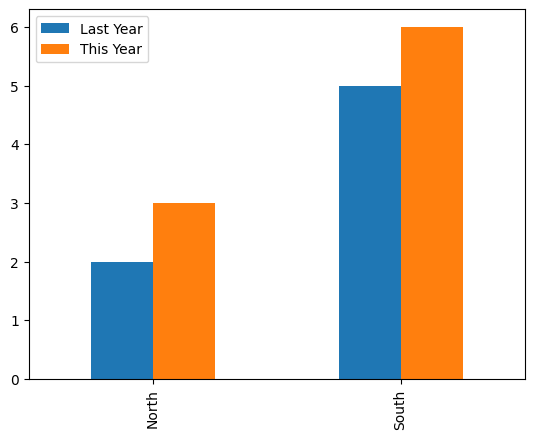

In [96]:
ax = df.T.plot.bar()
fig = ax.get_figure()

In [100]:
plot = sheet1.pictures.add(fig, name='SalesPlot',
                           top=sheet1['H19'].top,
                           left=sheet1['H19'].left)
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [101]:
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

In [114]:
[book.close() for book in xw.books]

[None, None]